In [2]:
'''
Assignment 2
Student: Fabian Gobet
'''
# *** Packges ***
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#import torch.optim.lr_scheduler as lr_scheduler

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'

In [3]:
# *** Functions ***
def histo(dataset, set_name):
    labels = dataset.classes
    counts = [0 for _ in labels]
    dic = {c:None for c in labels}

    for img, lbl in dataset:
        if dic[labels[lbl]] is None:
            dic[labels[lbl]] = img
        counts[lbl] = counts[lbl]+1

    fig = plt.figure(figsize=(10,5))
    fig.suptitle(set_name+" class image sample")
    for i in range(1,11):
        ax = fig.add_subplot(2,5,i)
        ax.imshow(dic[labels[i-1]])
        ax.axis('off')
        ax.set_title(labels[i-1])
    plt.show()

    fig, ax = plt.subplots(figsize=(10,5))
    fig.suptitle(set_name+" frequency per class")
    plt.bar(dataset.classes, counts)
    plt.xticks(fontsize=8)
    plt.ylabel("frequency")
    plt.show()

def plot_results(x,y1,y2,ylabel,label1,label2,title,save_name=None,show=False,color1='blue',color2='green'):
        fig, _ = plt.subplots(figsize=(7,5))
        fig.suptitle(title)
        plt.plot(x, y1, color=color1, label=label1)
        plt.plot(x, y2, color=color2, label=label2)
        plt.xlabel("steps")
        plt.ylabel(ylabel)
        plt.legend()
        if(save_name is not None):
            plt.savefig(save_name)
        if(show):
            plt.show()


def loss_acc_message(epoch,num_epochs,step,max_steps,train_loss,val_loss,train_acc,val_acc):
    print(f"Epoch {epoch}/{num_epochs}, Step {step}/{max_steps}")
    print(f"Train -> accuracy: {train_acc[-1]*100:.2f}, loss: {train_loss[-1]:.4f}")
    print(f"Validation -> accuracy: {val_acc[-1]*100:.2f}, loss: {val_loss[-1]:.4f}\n")

In [4]:
if __name__ == "__main__":
    # Set the seed for reproducibility
    manual_seed = 42
    torch.manual_seed(manual_seed)


    # 1.1.1
    dataset_train = torchvision.datasets.CIFAR10(root='./data', train=True, download=True)
    dataset_test = torchvision.datasets.CIFAR10(root='./data', train=False, download=True)
    #histo(dataset_train, "Cifar10 train set")
    #histo(dataset_test, "Cifar10 test set")

Files already downloaded and verified
Files already downloaded and verified


In [5]:
    # 1.1.2
    sample = dataset_train[0]
    print(f"\n1.1.2: dataset_train[0].shape -> type: {type(sample)}")
    for i in sample:
        print(f"1.1.2: type(dataset_train[0]) components -> type: {type(i)}")

    transform1 = transforms.ToTensor()
    dataset_train.transform = transform1
    dataset_test.transform = transform1


    sample = dataset_train[0]
    print(f"1.1.2: transform1(dataset_train[0]) -> type: {type(sample)}")
    for i in sample:
        print(f"1.1.2: type(transform1(dataset_train[0])) components -> type: {type(i)}")
    i,_ = sample
    print(f"1.1.2: type(transform1(dataset_train[0][0]))  -> shape: {i.shape}, dtype: {i.dtype}\n")


1.1.2: dataset_train[0].shape -> type: <class 'tuple'>
1.1.2: type(dataset_train[0]) components -> type: <class 'PIL.Image.Image'>
1.1.2: type(dataset_train[0]) components -> type: <class 'int'>
1.1.2: transform1(dataset_train[0]) -> type: <class 'tuple'>
1.1.2: type(transform1(dataset_train[0])) components -> type: <class 'torch.Tensor'>
1.1.2: type(transform1(dataset_train[0])) components -> type: <class 'int'>
1.1.2: type(transform1(dataset_train[0][0]))  -> shape: torch.Size([3, 32, 32]), dtype: torch.float32



In [6]:
    # 1.1.3
    transform2 = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
    transform3 = transforms.Compose([transforms.RandomHorizontalFlip(),transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
    dataset_train.transform = transform3
    dataset_test.transform = transform2

In [7]:
    # 1.1.4
    dataset_train, dataset_val = train_test_split(dataset_train, test_size=0.2, random_state=42, shuffle=True)
    #print(f"1.1.4: train_data, train_labels -> type: {type(train_data)}, {type(train_labels)}")
    #print(f"1.1.4: train_data -> shape: {train_data.shape}\n")

    #train_data = torch.FloatTensor(train_data).permute(0,3,1,2)
    #val_data = torch.FloatTensor(val_data).permute(0,3,1,2)
    #test_data = torch.FloatTensor(dataset_test.data).permute(0,3,1,2)
    #train_labels = torch.LongTensor(train_labels)
    #val_labels = torch.LongTensor(val_labels)
    #test_labels = torch.LongTensor(dataset_test.targets)
    '''
    print(f"1.1.4: train_data -> shape: {train_data.shape}, dtype: {train_data.dtype}")
    print(f"1.1.4: train_labels -> shape: {train_labels.shape}, dtype: {train_labels.dtype}")
    print(f"1.1.4: val_data -> shape: {val_data.shape}, dtype: {val_data.dtype}")
    print(f"1.1.4: val_labels -> shape: {val_labels.shape}, dtype: {val_labels.dtype}")
    print(f"1.1.4: test_data -> shape: {test_data.shape}, dtype: {test_data.dtype}")
    print(f"1.1.4: test_labels -> shape: {test_labels.shape}, dtype: {test_labels.dtype}\n")
    '''
    sample = dataset_train[0]
    print(f"1.1.2: transform1(dataset_train[0]) -> type: {type(sample)}")
    for i in sample:
        print(f"1.1.2: type(transform1(dataset_train[0])) components -> type: {type(i)}")
    print(dataset_train[0][0].shape)

1.1.2: transform1(dataset_train[0]) -> type: <class 'tuple'>
1.1.2: type(transform1(dataset_train[0])) components -> type: <class 'torch.Tensor'>
1.1.2: type(transform1(dataset_train[0])) components -> type: <class 'int'>
torch.Size([3, 32, 32])


In [8]:
    # 1.2
    class myNet(nn.Module):
        def __init__(self):
            super().__init__()
            self.conv1 = nn.Conv2d(3, 16, 3, 1, padding=1,bias=False) # 32 16
            self.bn1 = nn.BatchNorm2d(16)
            self.conv2 = nn.Conv2d(16, 32, 3, 1, padding=1,bias=False) # 16 8
            self.bn2 = nn.BatchNorm2d(32)
            self.conv3 = nn.Conv2d(32, 64, 3, 1, padding=1,bias=False) # 8 4
            self.bn3 = nn.BatchNorm2d(64)

            self.pool1 = nn.MaxPool2d(kernel_size=(2,2),stride=2)

            self.fc1 = nn.Linear(4*4*64, 500,bias=False)
            self.fc2 = nn.Linear(500, 10,bias=False)

            self.drop1 = nn.Dropout(0.5)


        def forward(self,x):
            x = self.bn1(F.relu(self.conv1(x)))
            x = self.pool1(x)
            x = self.bn2(F.relu(self.conv2(x)))
            x = self.pool1(x)
            x = self.bn3(F.relu(self.conv3(x)))
            x = self.pool1(x)
            x = self.drop1(x)

            x = x.view(-1,4*4*64)
            x = F.relu(self.fc1(x))
            x = self.drop1(x)
            x = self.fc2(x)
            return x

In [18]:
    # 1.3.1
    batch_size = 32
    num_epochs = 30
    learning_rate = 7e-4
    weight_decay = 1e-5
    max_steps = -((-len(dataset_train)*num_epochs)//batch_size)
    n = max_steps//25

In [10]:
    train_loader = DataLoader(dataset=dataset_train, batch_size=batch_size, num_workers=2, shuffle=True)
    val_loader = DataLoader(dataset=dataset_val, batch_size=len(dataset_val), num_workers=2)
    test_loader = DataLoader(dataset=dataset_test, batch_size=len(dataset_test), num_workers=2)

In [19]:
    def count_parameters(model):
      parameters = [p.numel() for p in model.parameters() if p.requires_grad]
      print(f"Parameters count list -> {parameters}")
      print(f"Total parameters -> {sum(parameters)}")


    DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model = myNet().to(DEVICE)

    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    loss_fn = nn.CrossEntropyLoss()
    #scheduler = lr_scheduler.LinearLR(optimizer, start_factor=1.0, end_factor=0.5, total_iters=max_steps)
    count_parameters(model)
    #print(f"1.3: {model}")
    #print(f"1.3: {optimizer}")

    train_acc = []
    val_acc = []
    train_loss = []
    val_loss = []
    step_indices = [0]
    step = 0


    # Initialize lists on step 0
    with torch.no_grad():
      model.eval()
      for i, (d,t) in enumerate([next(iter(train_loader)), next(iter(val_loader))],0):
        d = d.to(DEVICE)
        t = t.to(DEVICE)
        t_yhat = model(d)
        _, pred = torch.max(t_yhat.data,1)
        corr = (pred == t).sum().item()
        t_loss = loss_fn(t_yhat,t)
        if i==0:
            train_loss.append(t_loss.item())
            train_acc.append(corr/len(t))
        else:
            val_loss.append(t_loss.item())
            val_acc.append(corr/len(t))

Parameters count list -> [432, 16, 16, 4608, 32, 32, 18432, 64, 64, 512000, 5000]
Total parameters -> 540696


In [20]:
    # 1.3.2
    running = [0.0,0,0]
    loss_acc_message(0,num_epochs,step,max_steps,train_loss,val_loss,train_acc,val_acc)
    for epoch in range(1,num_epochs+1):
        for batch_num, (t_data,t_targets) in enumerate(train_loader,1):
            step = step + 1
            running[2] = running[2]+1
            model.train()
            t_data = t_data.to(DEVICE)
            t_targets = t_targets.to(DEVICE)

            t_yhat = model(t_data)

            t_loss = loss_fn(t_yhat,t_targets)
            running[0] = running[0] + t_loss.item()
            _, t_pred = torch.max(t_yhat.data,1)
            running[1] = running[1] + (t_pred == t_targets).sum().item()
            t_loss.backward()

            if step%n==0 or step==max_steps:

                step_indices.append(step)

                train_loss.append(running[0]/running[2])
                train_acc.append(running[1]/(running[2]*len(t_targets)))
                running = [0.0,0,0]

                with torch.no_grad():
                    model.eval()
                    for val_data, val_labels in val_loader:
                      val_data = val_data.to(DEVICE)
                      val_labels = val_labels.to(DEVICE)

                      v_yhat = model(val_data)

                      _, v_pred = torch.max(v_yhat.data,1)
                      v_correct = (v_pred == val_labels).sum().item()
                      val_acc.append(v_correct/len(val_labels))

                      v_loss = loss_fn(v_yhat,val_labels)
                      val_loss.append(v_loss.item())

                loss_acc_message(epoch,num_epochs,step,max_steps,train_loss,val_loss,train_acc,val_acc)

            optimizer.step()
            optimizer.zero_grad()
            #scheduler.step()

Epoch 0/30, Step 0/37500
Train -> accuracy: 15.62, loss: 2.3026
Validation -> accuracy: 10.65, loss: 2.3028

Epoch 2/30, Step 1500/37500
Train -> accuracy: 46.92, loss: 1.4751
Validation -> accuracy: 61.05, loss: 1.0896

Epoch 3/30, Step 3000/37500
Train -> accuracy: 59.18, loss: 1.1471
Validation -> accuracy: 66.25, loss: 0.9481

Epoch 4/30, Step 4500/37500
Train -> accuracy: 63.64, loss: 1.0297
Validation -> accuracy: 70.09, loss: 0.8534

Epoch 5/30, Step 6000/37500
Train -> accuracy: 66.15, loss: 0.9665
Validation -> accuracy: 71.75, loss: 0.8176

Epoch 6/30, Step 7500/37500
Train -> accuracy: 68.20, loss: 0.9100
Validation -> accuracy: 73.47, loss: 0.7690

Epoch 8/30, Step 9000/37500
Train -> accuracy: 69.81, loss: 0.8610
Validation -> accuracy: 74.80, loss: 0.7404

Epoch 9/30, Step 10500/37500
Train -> accuracy: 70.95, loss: 0.8284
Validation -> accuracy: 74.65, loss: 0.7405

Epoch 10/30, Step 12000/37500
Train -> accuracy: 71.90, loss: 0.7993
Validation -> accuracy: 75.21, loss: 

In [21]:
    with torch.no_grad():
        model.eval()
        for test_data, test_labels in test_loader:
          test_data = test_data.to(DEVICE)
          test_labels = test_labels.to(DEVICE)
          test_yhat = model(test_data)
          _, test_pred = torch.max(test_yhat,1)
          test_corr = (test_pred == test_labels).sum().item()
          acc = (test_corr*100)/len(test_labels)
          print(f"Test -> accuracy: {acc:.2f}\n")

Test -> accuracy: 79.62



In [22]:
    # 1.3.3
    checkpoint = {
        'model_state' : model.state_dict(),
        'optimizer' : optimizer.state_dict()
    }

    torch.save(checkpoint, 'Fabian_Gobet_1.pt')

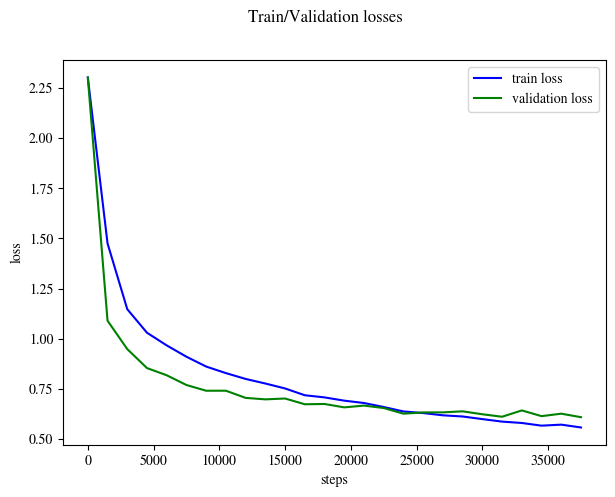

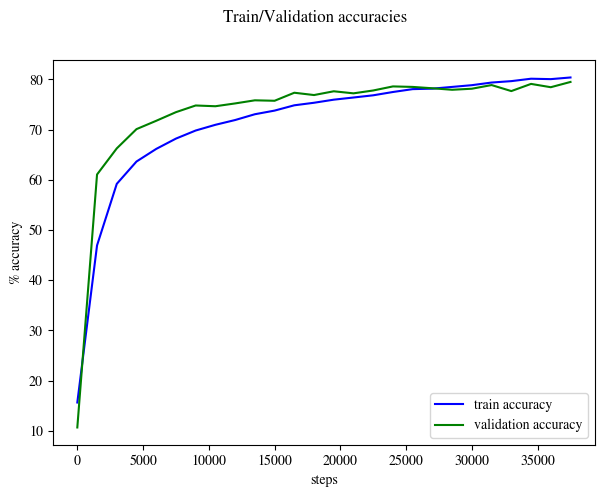

In [23]:
    # 1.3.4
    plot_results(step_indices,train_loss,val_loss,'loss','train loss','validation loss','Train/Validation losses',show=True)#, save_name="losses")
    plot_results(step_indices,torch.tensor(train_acc)*100,torch.tensor(val_acc)*100,'% accuracy','train accuracy','validation accuracy','Train/Validation accuracies',show=True)#, save_name="accs")

In [ ]:
   '''
    Code for bonus question
    '''
    for seed in range(10):
        torch.manual_seed(seed)
        # Train the models here